In [8]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

    epoch  train loss  train acc  valid loss  valid acc  test acc  test cer
0     1.0    2.809784     0.3380    1.146322     0.6675  0.000000  1.000000
1     2.0    0.625199     0.7969    0.470219     0.7590  0.000000  1.000000
2     3.0    0.297471     0.9010    0.448616     0.7930  0.000000  1.000000
3     4.0    0.181055     0.9383    0.394273     0.8179  0.000000  1.000000
4     5.0    0.128842     0.9562    0.381350     0.8342  0.000000  1.000000
5     6.0    0.108659     0.9633    0.420388     0.8443  0.000000  1.000000
6     7.0    0.081663     0.9723    0.376883     0.8551  0.000000  1.000000
7     8.0    0.109684     0.9646    0.392292     0.8616  0.000000  1.000000
8     9.0    0.063292     0.9788    0.452747     0.8667  0.000000  1.000000
9    10.0    0.067826     0.9778    0.480793     0.8694  0.000000  1.000000
10   11.0    0.070866     0.9763    0.423342     0.8732  0.000000  1.000000
11   12.0    0.049689     0.9835    0.403083     0.8766  0.000000  1.000000
12   13.0   

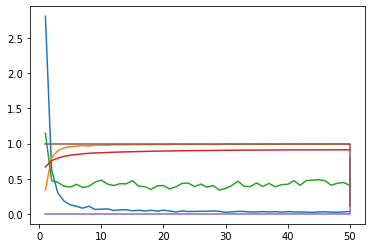

In [13]:
def extrat( logFile):
    f = open(logFile)
    lines = f.readlines()

    testAccuracy = 0
    testCir = 1
    result= np.empty( (0,7), dtype=np.float)

    for line in lines:
        # if match test result, store
        matchObj= re.match("len 4 accuracy (\d+\.\d+) cir (\d+\.\d+)", line)
        if matchObj:
            testAccuracy= float(matchObj.group(1))
            testCir = float(matchObj.group(2))
            continue

        # if match epoch result, extract and print
        matchObj= re.match("Epoch (\d+) Loss (\d+\.\d+)  acc: (\d+\.\d+) \[ Validation Loss (\d+\.\d+) valid_acc: (\d+\.\d+) \]", 
                           line)
        if matchObj:
            epoch= int( matchObj.group(1))
            trainLoss= float( matchObj.group(2))
            trainAcc=  float( matchObj.group(3))
            validLoss= float( matchObj.group(4))
            validAcc= float( matchObj.group(5))

            # print
            result = np.append( result, 
                       np.array([[epoch, trainLoss, trainAcc, validLoss, validAcc, testAccuracy, testCir]]), 
                       axis=0) 
            
    result = np.append( result, 
               np.array([[epoch, trainLoss, trainAcc, validLoss, validAcc, testAccuracy, testCir]]), 
               axis=0) 
    

    fig = plt.figure()
    plt.plot(result[:,0], result[:,1], '-')
    plt.plot(result[:,0], result[:,2], '-')
    plt.plot(result[:,0], result[:,3], '-')
    plt.plot(result[:,0], result[:,4], '-')
    plt.plot(result[:,0], result[:,5], '-')
    plt.plot(result[:,0], result[:,6], '-')

    pdata= pd.DataFrame(data=result, 
                        columns=['epoch', 'train loss', 'train acc', 'valid loss', 'valid acc', 'test acc', 'test cer'])
    print( pdata)

    return result, pdata

res, pdata = extrat( './train-folder/log/train_mixed_try11.txt')



In [ ]:
res, pdata = extrat( './train-folder/log/train_mixed_try11.txt')


     epoch  train loss  train acc  valid loss  valid acc  test acc  test cer
0      1.0    2.986645     0.3037    0.940006     0.7090  0.000000  1.000000
1      2.0    0.599539     0.7992    0.469384     0.7800  0.000000  1.000000
2      3.0    0.292222     0.8997    0.390497     0.8160  0.000000  1.000000
3      4.0    0.196560     0.9329    0.418227     0.8338  0.000000  1.000000
4      5.0    0.138049     0.9523    0.375724     0.8478  0.000000  1.000000
..     ...         ...        ...         ...        ...       ...       ...
146  147.0    0.018094     0.9948    0.141442     0.9747  0.811404  0.114218
147  148.0    0.021676     0.9940    0.141158     0.9746  0.811404  0.114218
148  149.0    0.017353     0.9947    0.121940     0.9746  0.811404  0.114218
149  150.0    0.017932     0.9948    0.107358     0.9746  0.811404  0.114218
150  150.0    0.017932     0.9948    0.107358     0.9746  0.811404  0.117690

[151 rows x 7 columns]


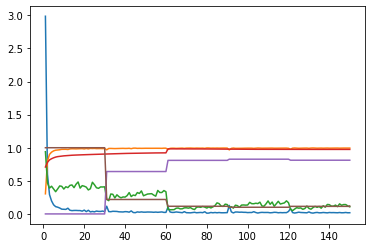

In [16]:
def extrat( logFile):
    f = open(logFile)
    lines = f.readlines()

    testAccuracy = 0
    testCir = 1
    result= np.empty( (0,7), dtype=np.float)

    dx= 0
    
    for line in lines:
        # if match test result, store
        matchObj= re.match("len 4 accuracy (\d+\.\d+) cir (\d+\.\d+)", line)
        if matchObj:
            testAccuracy= float(matchObj.group(1))
            testCir = float(matchObj.group(2))
            continue

        # if match epoch result, extract and print
        matchObj= re.match("Epoch (\d+) Loss (\d+\.\d+)  acc: (\d+\.\d+) \[ Validation Loss (\d+\.\d+) valid_acc: (\d+\.\d+) \]", 
                           line)
        if matchObj:
            epoch= int( matchObj.group(1)) + dx
            trainLoss= float( matchObj.group(2))
            trainAcc=  float( matchObj.group(3))
            validLoss= float( matchObj.group(4))
            validAcc= float( matchObj.group(5))

            # print
            result = np.append( result, 
                       np.array([[epoch, trainLoss, trainAcc, validLoss, validAcc, testAccuracy, testCir]]), 
                       axis=0) 
            
            if epoch == 60:
                dx= 60
            
    result = np.append( result, 
               np.array([[epoch, trainLoss, trainAcc, validLoss, validAcc, testAccuracy, testCir]]), 
               axis=0) 
    

    fig = plt.figure()
    plt.plot(result[:,0], result[:,1], '-')
    plt.plot(result[:,0], result[:,2], '-')
    plt.plot(result[:,0], result[:,3], '-')
    plt.plot(result[:,0], result[:,4], '-')
    plt.plot(result[:,0], result[:,5], '-')
    plt.plot(result[:,0], result[:,6], '-')

    pdata= pd.DataFrame(data=result, 
                        columns=['epoch', 'train loss', 'train acc', 'valid loss', 'valid acc', 'test acc', 'test cer'])
    print( pdata)

    return result, pdata

res, pdata = extrat( './train-folder/log/curriculum_10.txt')



In [17]:
print( pdata.to_string())

     epoch  train loss  train acc  valid loss  valid acc  test acc  test cer
0      1.0    2.986645     0.3037    0.940006     0.7090  0.000000  1.000000
1      2.0    0.599539     0.7992    0.469384     0.7800  0.000000  1.000000
2      3.0    0.292222     0.8997    0.390497     0.8160  0.000000  1.000000
3      4.0    0.196560     0.9329    0.418227     0.8338  0.000000  1.000000
4      5.0    0.138049     0.9523    0.375724     0.8478  0.000000  1.000000
5      6.0    0.110085     0.9626    0.335740     0.8587  0.000000  1.000000
6      7.0    0.101679     0.9655    0.377609     0.8657  0.000000  1.000000
7      8.0    0.088993     0.9693    0.422900     0.8701  0.000000  1.000000
8      9.0    0.071744     0.9760    0.416553     0.8738  0.000000  1.000000
9     10.0    0.069907     0.9765    0.375867     0.8773  0.000000  1.000000
10    11.0    0.068405     0.9767    0.410310     0.8799  0.000000  1.000000
11    12.0    0.086338     0.9731    0.397748     0.8823  0.000000  1.000000